In [1]:
import matplotlib.pyplot as plt
import cv2
import numpy as np

In [2]:
def region_of_interest(img, vertices):
    mask = np.zeros_like(img)
    #channel_count = img.shape[2]
    match_mask_color = 255
    cv2.fillPoly (mask, vertices, match_mask_color )
    masked_image = cv2.bitwise_and(img, mask)
    return masked_image

In [3]:
def draw_the_lines(img, lines):
    blank_image = np.zeros((img.shape[0], img.shape[1], 3), dtype=np.uint8)
    
    for line in lines:
        for x1, y1, x2, y2 in line:
            cv2.line(blank_image, (x1,y1), (x2,y2), (0,255,0), thickness=1)
        
    img = cv2.addWeighted(img, 0.8, blank_image, 1, 0.0)
    return img

(183, 275, 3)


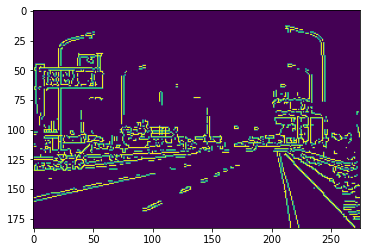

<function matplotlib.pyplot.show(close=None, block=None)>

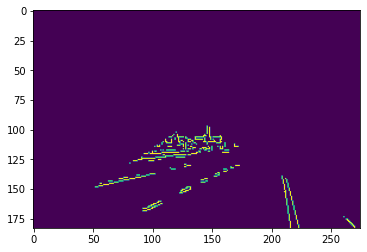

In [4]:
image = cv2.imread('road.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
print(image.shape)
height = image.shape[0]
width = image.shape[1]
region_of_interest_vertices = [
    (0, height),
    (width/2, height/2),
    (width, height)]
gray_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
canny_image = cv2.Canny(gray_image, 160, 200)
cropped_image = region_of_interest(canny_image, np.array([region_of_interest_vertices], np.int32))

plt.imshow(canny_image)
plt.show()
plt.imshow(cropped_image)
plt.show

(5, 1, 4)


<function matplotlib.pyplot.show(close=None, block=None)>

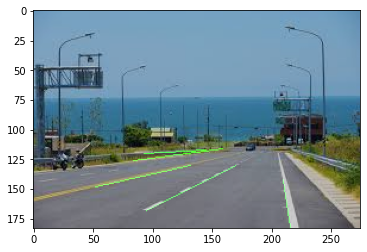

In [5]:
lines = cv2.HoughLinesP(cropped_image,
                      rho = 1,
                      theta = np.pi/180,
                      threshold=35,
                      minLineLength=35,
                      maxLineGap=25)
print(lines.shape)
image_with_lines = draw_the_lines(image, lines)
plt.imshow(image_with_lines)
plt.show